In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
print(generation_data['SOURCE_KEY'].unique().size)
print(weather_data['SOURCE_KEY'].unique().size)

print(generation_data['PLANT_ID'].unique().size)
print(weather_data['PLANT_ID'].unique().size)

22
1
1
1


In [7]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


#Format datetime columns and merge Data Frames

In [8]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data["DATE_TIME"])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data["DATE_TIME"])

In [9]:
df = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [10]:
df.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


#Looking for null and missing values

In [11]:
df.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [12]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,45680.000000,45680.000000,45680.000000,4.568000e+04,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6.957007e+06,25.917168,31.877975,0.236834
std,4080.448523,398.668968,3156.100252,4.172386e+05,3.556550,12.638448,0.306316
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,0.000000,0.000000,0.000000,6.512358e+06,22.930031,21.406390,0.000000
50%,464.196429,44.912500,2653.633928,7.115711e+06,24.993020,25.379072,0.035266
75%,6478.424107,634.481250,6318.000000,7.244521e+06,28.379008,42.757119,0.459503
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


In [13]:
df.count()

DATE_TIME              45680
SOURCE_KEY             45680
DC_POWER               45680
AC_POWER               45680
DAILY_YIELD            45680
TOTAL_YIELD            45680
AMBIENT_TEMPERATURE    45680
MODULE_TEMPERATURE     45680
IRRADIATION            45680
dtype: int64

#Check for correlation of input fields

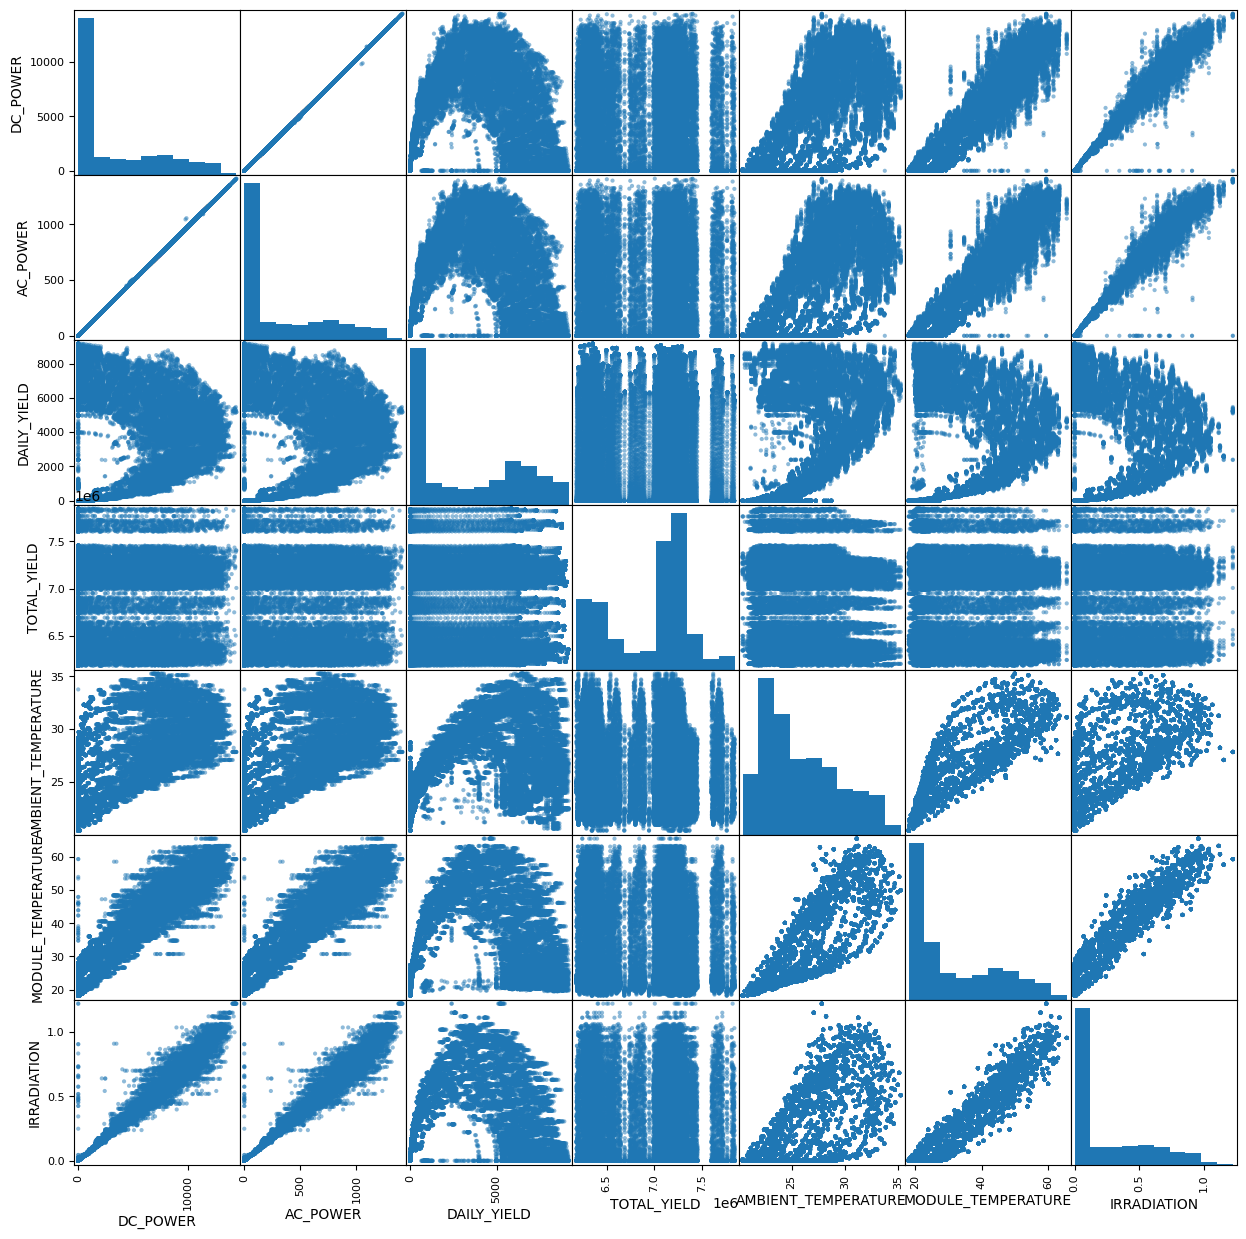

In [14]:
pd.plotting.scatter_matrix(df, figsize=(15,15))

plt.show()

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.999996,0.076710,0.004055,0.703796,0.954692,0.991305
AC_POWER,0.999996,1.000000,0.076628,0.004043,0.704035,0.954810,0.991260
DAILY_YIELD,0.076710,0.076628,1.000000,0.007277,0.489709,0.203702,0.071937
TOTAL_YIELD,0.004055,0.004043,0.007277,1.000000,-0.036532,-0.014713,-0.004981
AMBIENT_TEMPERATURE,0.703796,0.704035,0.489709,-0.036532,1.000000,0.843456,0.702218
MODULE_TEMPERATURE,0.954692,0.954810,0.203702,-0.014713,0.843456,1.000000,0.959346
IRRADIATION,0.991305,0.991260,0.071937,-0.004981,0.702218,0.959346,1.000000


#Convert 'SOURCE_KEY' to numerical type

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   SOURCE_KEY_NUMBER    45680 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.8+ MB


#Solar Power Prediction

Preparation

In [17]:
df_ml = df.copy()
X = df[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER']

In [18]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DAILY_YIELD,1.000000,0.007277,0.489709,0.071937
TOTAL_YIELD,0.007277,1.000000,-0.036532,-0.004981
AMBIENT_TEMPERATURE,0.489709,-0.036532,1.000000,0.702218
IRRADIATION,0.071937,-0.004981,0.702218,1.000000


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_score = lr_model.score(X_test, y_test)
print(f"Score is {lr_score*100:.4f} %")

Score is 98.3650 %


#kNN

In [21]:
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 2 with 88.3269 %


#Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

Score is 98.2549 %


#Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 99.0214 %


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [29]:
# set the order of the ARIMA model
order = (1, 1, 1)

# create the ARIMA model
arima_model = ARIMA(y_train, order=order)

# fit the ARIMA model
arima_model_fit = arima_model.fit()

# get the predicted values for the test data
arima_pred = arima_model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
arima_mse = mean_squared_error(y_test, arima_pred)

print(f"ARIMA model mean squared error: {arima_mse:.4f}")

ARIMA model mean squared error: 160987.4918


In [31]:
# set the order and seasonal order of the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# create the SARIMA model
sarima_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)

# fit the SARIMA model
sarima_model_fit = sarima_model.fit()

# get the predicted values for the test data
sarima_pred = sarima_model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
# calculate the mean squared error
sarima_mse = mean_squared_error(y_test, sarima_pred)

print(f"SARIMA model mean squared error: {sarima_mse:.4f}")

SARIMA model mean squared error: 160979.2798
